In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from palettable.colorbrewer.diverging import *

# Make a map

In [16]:
lat_lon = np.loadtxt("inference_lat_lon.txt")
Y = np.loadtxt("Inference_Y.txt")

/projects/erke2265/miniconda/envs/alpine3d/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


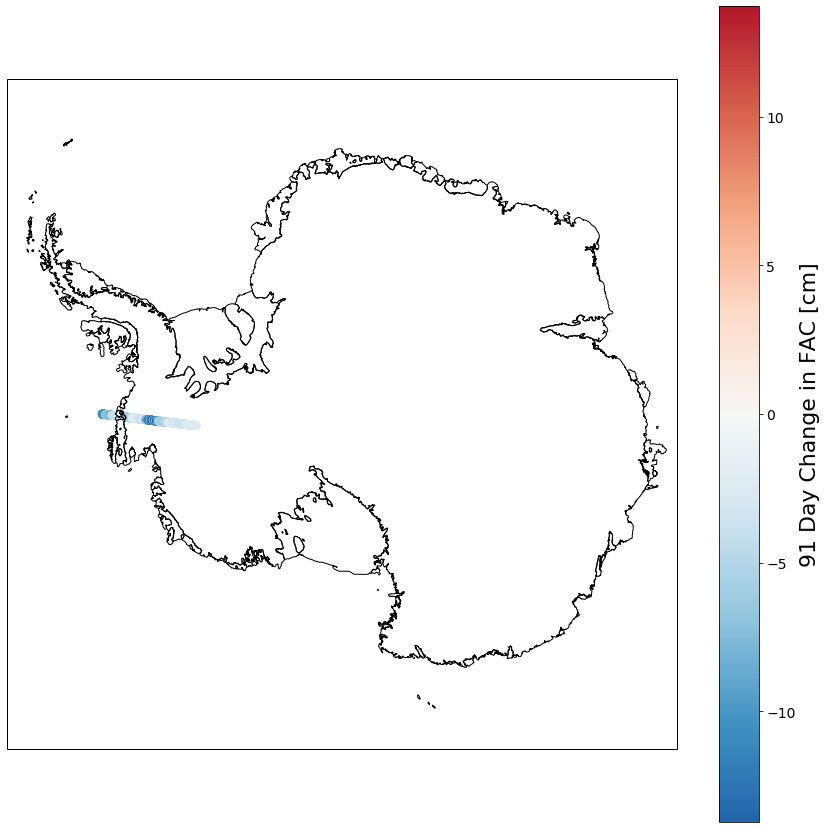

In [17]:
# Get coastlines
df = gpd.read_file("/pl/active/nasa_smb/Data/ADD_Coastline_low_res_polygon.shp")
crs_epsg = ccrs.SouthPolarStereo()
df_epsg = df.to_crs(epsg='3031')

# Generate figure 
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(15, 15))

# Plot sites
colormap = RdBu_9.mpl_colormap.reversed()
lim = np.max(np.abs(Y).max())
plt.scatter(lat_lon[:,1], lat_lon[:,0], c=Y, linewidth=3, transform=ccrs.PlateCarree(), cmap=colormap, vmin=-lim, vmax=lim)
cb = plt.colorbar()
cb.set_label("91 Day Change in FAC [cm]", fontsize=22)
cb.ax.tick_params(labelsize=14) 

# Plot coastlines
axs.set_extent((-180, 180, -90, -65), ccrs.PlateCarree())
axs.add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='none', edgecolor='black')